# SoS Magics

In addition to SoS statements, you can use a few SoS magics in Jupyter notebook. 

1. SoS magics have to be specified at the beginning of a cell, although they can be specified after empty lines and comments.
2. Lines ending with `"\"` will be joined so you can break long magics into multiple lines
3. Multiple magics can be used in a single cell.

This section lists all magics that SoS supports. To get a list of magics, you can enter `%` at the beginning of a line and press tab. You can also get the detailed usage of a magic by executing a magic with `-h` option, for example:

In [45]:
%use -h

usage: %use [-h] [-k KERNEL] [-l LANGUAGE] [-c COLOR] [-r]
            [-i [IN_VARS [IN_VARS ...]]] [-o [OUT_VARS [OUT_VARS ...]]]
            [name]

Switch to a specified subkernel.

positional arguments:
  name                  Displayed name of kernel to start (if no kernel with
                        name is specified) or switch to (if a kernel with this
                        name is already started). The name is usually a kernel
                        name (e.g. %use ir) or a language name (e.g. %use R)
                        in which case the language name will be used. One or
                        more parameters --language or --kernel will need to be
                        specified if a new name is used to start a separate
                        instance of a kernel.

optional arguments:
  -h, --help            show this help message and exit
  -k KERNEL, --kernel KERNEL
                        kernel name as displayed in the output of jupyter
                       

Note that subkernels can have their own magics, and SoS basically processes all blank lines and known magics and send rest of the cell content to the subkernel. That is to say, because SoS does not define a `pwd` magic, the following magic would be process by the Python 3 subkernel.

In [46]:
%pwd

'/Users/bpeng1/sos/docs/src/documentation'

### `%cd`

Change the current working directory of the SoS kernel to `dir`. The working directory of started subkernels is not affected.

### `%dict` 

The `%dict` magic lists or rests the content of SoS dict, using syntax

```
%dict [-a|-all] [-k|--keys] [-r|--reset] [var1] [var2] ...
```

where

* `var1`, `var2` etc are name of variables. All variables will be displayed if no variable is specified.
* `-a|-all`: list all dictionary keys, including SoS functions and variables.
* `-k|--keys`: list only keys, not their values
* `-r|--reset`: reset the dictionary to its original content (with only SoS internal values)

In [47]:
%dict --reset
%dict --keys

set()

and reset the dictionary with the `--reset` option

In [48]:
%dict --keys

{'sos_var'}

For example, you can see all keys in the SoS dictionary using

In [49]:
%dict --reset
%dict --keys

set()

and reset the dictionary with the `--reset` option

In [50]:
%dict --keys

{'sos_var'}

For example, you can see all keys in the SoS dictionary using

### `%get`

Magics `%get` retrieve variables from SoS or another subkernel to the current subkernel started by magic `%use`.

For example,

In [51]:
%use sos
a = [1, 2, 3]
b = [1, 2, "3"]
c = True

In [52]:
%use R
%get a b c
a

[1] 1 2 3

In [53]:
b

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] "3"

In [54]:
c

[1] TRUE

The `%preview` magic cannot be used to preview variables in the subkernel so we have to list them one by one. As you can see, a Python list can be converted to `R` array or list depending on its content. 

Similar to the `%put` magic, SoS automatically translate variables with invalid Python names. For example

In [55]:
%use sos
_var = 'Hi, Bob'

In [56]:
%use R
%get _var
.var

Variable _var is passed from SoS to kernel ir as .var


[1] "Hi, Bob"

In [57]:
%use sos

Also similar to the `--to` option of magic `%put`, magic `%get` accept a parameter `--from` to get variables from SoS (default) any kernel. For example,

In [58]:
R_var <- 'R variable'

In [59]:
%get --from R R_var
R_var

'R variable'

Depending on how the language module is defined, such cross-subkernel variable exchange can be achived directly, or by way of SoS, so after the `%get --from R R_var` statement, the `R_var` variable might or might not exist in the SoS kernel.

### `%matplotlib`

Similar to ipython's `matplotlib` magic, the `%matplotlib inline` magic allows the display of matplotlib figures inline in Jupyter notebook or qtconsole.

In [60]:
%matplotlib inline

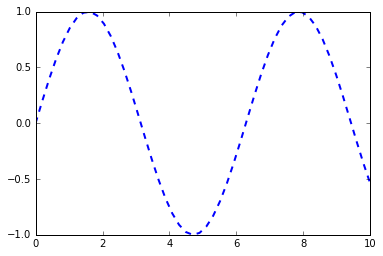

In [61]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10)
plt.plot(x, np.sin(x), '--', linewidth=2)
plt.show()

### `%paste`

This magic pastes content of clipboard to the cell and execute the cell. It is similar but sometimes more convenient than pasting the content using system shortcuts such as `Cmd-V` (mac). The additional options allow you to execute the pasted workflow with these options (see magic `%run` for details).

### `%put`

Magics `%put` are used to put variables from subkernel to SoS or another subkernel. 

For example

In [62]:
%use R
a = c(1)
b = c(1, 2, 3)
c = list(1, 2, 3)
d = list(1, 2, "3")
e = matrix(c(1,2,3,4), ncol=2)

In [63]:
%put a b c d e
%preview a b c d e

As you can see, although `a` is technically an array with length 1 in `R`, it is convertered to an integer in SoS. Variables `b` and `c` are converted to the same type (`list`) although they are of different types in `R`. Variable `e` are converted from `R` matrix to `numpy` array. 

Sometimes a valid variale name in a subkernel is not a valid name in SoS/Python. SoS would automatically convert such names with a warning message. For example,

In [64]:
.a.b = 5

In [65]:
%put .a.b
%preview _a_b --kernel sos

Variable .a.b is put to SoS as _a_b


In addition to putting variables from subkernel to SoS, you can also put variables from SoS to subkernel, or from any subkernel to another, using parameter `--to`. For example,

In [66]:
R_var <- 'R variable'

In [67]:
%put --to Python3 R_var

In [68]:
R_var

'R variable'

Depending on the language module, such cross-subkernel variable exchange can be performed directly, or by way of SoS. The former is generally faster and, in case of data exchange between instances of the same language, can usually be done witout loss of information.

### `%preview`

The `%preview` magic has been discussed above. Here is a complete list of options:

In [1]:
%preview -h

usage: %preview [-h] [-k KERNEL] [-w] [-s {table,scatterplot,png}] [-r [HOST]]
                [--off] [-p | -n]
                [items [items ...]]

Preview files, sos variables, or expressions in the side panel, or notebook if
side panel is not opened, unless options --panel or --notebook is specified.

positional arguments:
  items                 Filename, variable name, or expression. Wildcard
                        characters such as '*' and '?' are allowed for
                        filenames.

optional arguments:
  -h, --help            show this help message and exit
  -k KERNEL, --kernel KERNEL
                        kernel in which variables will be previewed. By
                        default the variable will be previewed in the current
                        kernel of the cell.
  -w, --workflow        Preview notebook workflow
  -s {table,scatterplot,png}, --style {table,scatterplot,png}
                        Option for preview file or variable, which by default
  

### `%render`

The `%render` magic converts the output of a cell to certain format before displaying it in the notebook. The format can be any format supported by the [`IPython.display` module](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) and is default to `Markdown`. For example, the following code displays all supported options of `%render` by checking the subclasses of `IPython.display`. The cell returns a string in markdown format and is rendered in `Markdown`.

In [70]:
%render
import IPython.display
import inspect

res = '''
Options of magic %render

'''

for key in IPython.display.__dict__.keys():
    cls = getattr(IPython.display, key)
    if inspect.isclass(cls) and issubclass(cls, IPython.display.DisplayObject):
        res += '* {}\n'.format(key)

# this is the output of this cell and will be rendered in Markdown format
res



Options of magic %render

* Audio
* TextDisplayObject
* SVG
* JSON
* GeoJSON
* Image
* Math
* Latex
* Markdown
* DisplayObject
* Video
* Pretty
* HTML
* Javascript


Similarly, you can use magic `%render` to render output in other formats:

In [71]:
%render HTML
'''
This is a table in HTML format <br>
<table style="width:100%">
  <tr>
    <th>Firstname</th>
    <th>Lastname</th> 
    <th>Age</th>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td> 
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td> 
    <td>94</td>
  </tr>
</table>
'''

Firstname,Lastname,Age
Jill,Smith,50
Eve,Jackson,94


The `%render` magic captures not only the return value of SoS cell, but also standard output of SoS and other cells. For example, a subprocess of the following cell (a Python script) prints the content of a SVG file to standard output, which is captured and displayed by magic `%render`.

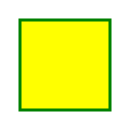

In [72]:
%render SVG
python:
print(r'''
 <svg height="140" width="140">
  <defs>
    <filter id="f1" x="0" y="0" width="200%" height="200%">
      <feOffset result="offOut" in="SourceAlpha" dx="20" dy="20" />
      <feGaussianBlur result="blurOut" in="offOut" stdDeviation="10" />
      <feBlend in="SourceGraphic" in2="blurOut" mode="normal" />
    </filter>
  </defs>
  <rect width="90" height="90" stroke="green" stroke-width="3" fill="yellow" filter="url(#f1)" />
  Sorry, your browser does not support inline SVG.
 </svg>
''')

The `%render` magic also works for other kernels although it can be tricky to determine what is printed to standard output. For kernel R, the function to print to standard output is `cat` so you can use `cat` to print something to the standard output for `%render` to process. For example,

In [73]:
%render
a <- rnorm(5)
cat(paste(length(a), "random numbers"))
cat(paste('*', a, collapse='\n'))

5 random numbers

* -0.226255000473571
* -0.178617752969736
* 0.759527153766551
* -1.16793202212282
* 0.500273824348608

### `%rerun`

The `%rerun` magic re-executed the last script, which is basically content of the last cell without the magics. This allows you to re-run the last cell with or without a new set of parameters. Note that cells without a script (e.g. a cell with only magics) does not change the last executed script.

In [6]:
%run
parameter: a = 10
[10]
print("a is set to ${a}")

a is set to 10


In [7]:
%rerun --a 20

a is set to 20


### `%run`

The `%run` magic allows you to run the content of a cell as a SoS workflow with specify SoS options such as `-v` (verbosity), `-j` (max number of jobs), and workflow options as defined by `parameter:` keyword.

**The content of the cell is extracted and executed as an independent SoS script prepended with [global] sections defined in the notebook**. The script does not use any existing variable so all parameters must be passed from command line (options of `%run`). The resulting dictionary will merged to the SoS dictionary to make it easy to check the result of the workflow, unless the workflow is executed remotely on another server (option `-r HOST`).

For example, if we define a variable in the SoS kernel,

In [1]:
var = 100

it is can be used in other scratch cells,

In [2]:
var += 100
print(var)

200


But not in the workflow executed by magic %run`

In [3]:
%sandbox --expect-error
%run
print(var)

Failed to process statement 'print(var)' (NameError): name 'var' is not defined


So you will have to pass the value as a parameter

In [4]:
%run --var 40
parameter: var = int
var += 400

However, when the workflow is executed, the workflow dictionary is merged to the SoS kernel so that you can examine the resulting variables,

In [5]:
print(var)

440


The `%run` magics also provides you a way to execute the same cell multiple times with different parameters, for example 

In [4]:
%run
%run --var 1
parameter: var=0
sh:
  echo ${var}

0
1


`%run` magic executes `global` sections defined in the notebook which allows you to define commonly used definitions in a `global` section and used them in every cell executed by `%run`. For example, although we define a variable `VAR` to be `this is local` in the notebook,

In [2]:
[global]
VAR='this is global'

In [1]:
VAR='this is local'

The global section is executed by the `%run` magic

In [3]:
%run
print(VAR)

this is global


Also, recall that statements defined before any section is considered as a global section without header, so if you redefine `VAR` in a cell as follows, it effectively appends `VAR = "this is local global"` to the `global` section, which changes the definition of `VAR`:

In [4]:
%run
VAR = "this is local global"

[step]
print(VAR)

this is local global


A complete list of arguments can be shown using the `-h` option. 

In [1]:
%use sos
%run -h

usage: run [-h] [-J EXTERNAL_JOBS] [-c CONFIG_FILE] [-t FILE [FILE ...]]
           [-b [BIN_DIR [BIN_DIR ...]]] [-q [QUEUE]] [-w] [-W] [-r [HOST]]
           [-n] [-s SIGMODE] [-d [DAG]] [-v {0,1,2,3,4}]
           [WORKFLOW]

Execute default or specified workflow defined in script

positional arguments:
  WORKFLOW              Name of the workflow to execute. This option can be
                        ignored if the script defines a default workflow (with
                        no name or with name `default`) or defines only a
                        single workflow. A subworkflow or a combined workflow
                        can also be specified, where a subworkflow executes a
                        subset of workflow (`name_steps` where `steps` can be
                        `n` (a step `n`), `:n` (up to step `n`), `n:m` (from
                        step `n` to `m`), and `n:` (from step `n`)), and a
                        combined workflow executes to multiple (sub)workflows


### `%save`

Magic `%save` saves the content of the current cell (after the magic itself) to specified file. It accepts the following options:

In [77]:
%save -h

### `%sosrun`

The `%sosrun` option is a very special magic in that it **executes SoS steps defined in the entire notebook**. Essentially speaking, this magic

* Collect the content of all SoS cells in the notebook (including the present cell) and extract all sections from it. Comments, magics, and statements before section header is ignored.
* Execute the entire workflow with options specified by magic `%sosrun` as a **separate workflow**. Default options specified by magic `%set` is honored. Similar to magic `%run`, the script does not use any existing variable but the workflow dictionary will be merged to the notebook dictionary after the completion of workflow (see magic `%run` for details). 

For example,

In [78]:
[global]
# this is the global section of a workflow
parameter: gvar = 20

In [79]:
[workflow_10]
print("This is step ${step_name}, with ${gvar}")

In [80]:
[workflow_20]
print("This is step ${step_name}, with ${gvar}")

In [8]:
%sosrun workflow --gvar 40

This is step workflow_10, with 40
This is step workflow_20, with 40


The content of the workflow is displayed at the side panel (if opened) so that you know what has been collected. Using the workflow feature of SoS, you can execute cells of a notebook conditionally, repeatedly, with different parameters...

The following example demonstrates how to execute a step repeated as a nested workflow of another workflow.

In [82]:
# this is a worker step
[worker]
parameter: val = 5
sh:
    echo process ${val}

In [83]:
# this step will execute the previous cell multiple times
%sosrun batch
[batch]
input: for_each={'val': range(5)}
sos_run('worker',val=val)

process 0
process 1
process 2
process 3
process 4


It is worth mentioning that "global definitions" in a cell without `[global]` header is excluded from the notebook workflow. For example, if we have a global definition 

In [ ]:
[global]
VAR = "this is global"

A `%run` magic can override definitions in a global section with global definitions without `[global]` header:

In [5]:
%run
VAR = "this is local global"
[local_global]
print(VAR)

this is local global


However, because `VAR = "this is local global"` is not included in a section and is execlued from the notebook workflow, the following `%sosrun` magic will have see the statements in the named `[global]` section:

In [6]:
%sosrun local_global

this is global


This is why we sometimes call global statements without `[global]` header **local global section** because they are only executed by magic `%run`, not `%sosrun`. 

### `%sossave`

Magic `%sossave` saves the **report** or **workflow** defined in the notebook to specified file, according to specified template.

1. Save workflow in `.sos` format
    * By default a workflow will be saved, which consists of cells that start with section header (ignoring leading comments and magics). The content of the file would be identical to the output of magic `%preview --workflow`.
    * If option `--all` (`-a`) is specified, all cells will be saved to a .sos file that might or might not be executable in batch mode.
    
2. Save report in `HTML` format
    * By default a template `sos-report` will be used to generate a HTML report, which includes all cells except for those with a `scratch` tag, and will display by default markdown cells without a `hide_output` tag, and output of code cells with a `report_output` tag. In another word, all mark down cells are displayed and output from all code cells are hidden unless you tag them otherwise with keyboard shortcut `Ctrl-Shift-O`. All contents could be displayed with a hidden control panel to the top left corner of the screen.
    * Other templates could be specified with option `--template`. For example, a `sos-full` report will generate a HTML file with all content.
    

This magic determines file format with file extension (e.g. `output.html` or option `--to` (e.g. `-t html`), an option `--force` to override existing file, and an option `-x` to add executable permission to the saved .sos file.

The `%sossave` can also help you track revisions of your analysis by committing files to git repository. If your notebook is under a git repository, you can use

* Option `-c` (`--commit`) to run command `git commit SAVEDFILE` with optional message specified by option `-m` (`--message`).
* Option `-p` (`--push`) to run command `git push`.


In [84]:
%sossave -h

usage: %sossave [-h] [-t {sos,html}] [-c] [-a] [-m MESSAGE] [-p] [-f] [-x]
                [--template TEMPLATE]
                [filename]

Save the jupyter notebook as workflow (consisting of all sos steps defined in
cells starting with section header) or a HTML report to specified file.

positional arguments:
  filename              Filename of saved report or script. Default to
                        notebookname with file extension determined by option
                        --to.

optional arguments:
  -h, --help            show this help message and exit
  -t {sos,html}, --to {sos,html}
                        Destination format, default to sos.
  -c, --commit          Commit the saved file to git directory using command
                        git commit FILE
  -a, --all             The --all option for sos convert script.ipynb
                        script.sos, which saves all cells and their metadata
                        to a .sos file, that contains all input informati

### `%set`

The `%set` magic sets a persistent sos options so you do not have to enter them each time after `%run` or `%paste`. For example, if you set `%set -v3`, you can execute all cells in the notebook at verbosity level 3 (`DEBUG`).

Note that this magic only accepts keyword arguments (with leading `-` or `--`) so you cannot use it to specify a default workflow to execute.

In [85]:
%set -v2
[cat_10]
[cat_20]

Set sos options to "-v2"


In [86]:
%set -v1
[mouse_10]
[mouse_20]

Set sos options to "-v1"


### `%sandbox`

The `%sandbox` magic executes the current cell in the temporary directory with a separate dictionary so that it would change SoS dictionary and files in the current directory. 

This magic accepts three parameters:

1. If `-d` or `--dir` is specified, sandbox will use the specified directory. It will create the directory if it is does not exist, and will not clean or remove the directory after the completion of execution.
2. If `-k` or `--keep-dict` is specified, the cell would use the existing SoS dictionary instead of creating a new one.
3. If `-e` or `--expect-error` is specified, the cell expects an error and would return `ok` only if an `error` occurs. In practice, this option would prevent Jupyter from stopping at a cell that expects an error when you execute the whole notebook with "execute all".

For example, this `ls` commands happens at the current directory

In [87]:
!ls Auxil*

ls: Auxil*: No such file or directory


but the notebook is not available in the sandbox

In [88]:
%sandbox
!ls Auxil*

ls: Auxil*: No such file or directory


and the sandbox dictionary is empty

In [89]:
%sandbox
%dict --keys

set()

Note that the working directory of subkernels is not affected by the `%sandbox` magic.

### `%sessioninfo`

Magic `%sessioninfo` returns the session information of SoS and all the subkernels, which for example include version of the python interpreter and name and version of all imported modules for Python kernels, and the output of function `sessionInfo()` for language R.

This magic also outputs values of a variable `sessioninfo` in the SoS namespace, which can be a dictionary of section header and items in the format of string, list of strings or `(key, value)` pairs, or dictionaries.  This mechanism is designed to output arbitrary additional session information, such as revision of documents and versions of commands. The latter has to be collected manually because there is no standard way to get the version information of commands.

For example, let us find the revision of this document and versions of two commands `rsync`,  and `awk` and put them in `sessioninfo`:

In [90]:
%preview -n sessioninfo
import time
from collections import OrderedDict
sessioninfo = OrderedDict()
sessioninfo['Programs'] = [
        ['rsync', get_output('rsync --version | head -1')],
        ['awk', get_output('awk -version')]
    ]
sessioninfo['Extra'] = [
        ['Date', time.strftime("%d/%m/%Y")],
        ['Revision', get_output('git rev-list --count HEAD')],
        ['HASH', get_output('git rev-parse HEAD')]
    ]


%preview sessioninfo

>>> sessioninfo:

OrderedDict([('Programs',
              [['rsync', 'rsync  version 2.6.9  protocol version 29\n'],
               ['awk', 'awk version 20070501\n']]),
             ('Extra',
              [['Date', '03/07/2017'],
               ['Revision', '4010\n'],
               ['HASH', '1899a56c03aa4f29033a704e2c1fe718c4f598bd\n']])])

Then, after we load Python3 and R,

In [91]:
import pandas
import numpy

In [92]:
library('ggplot2')


Attaching package: ‘ggplot2’
The following object is masked from ‘mtcars’:

    mpg


We can run `%sessioninfo` to display all session information:

In [93]:
%sessioninfo

SoS 
 
 
 SoS Version 0.9.8.5 
 
 
 numpy 1.11.1 
 
 
 IPython 6.1.0 
 
 
 Python3 
 
 
 Kernel python3 
 
 
 Language Python3 
 
 
 Version 3.5.2 |Anaconda custom (x86_64)| (default, Jul 2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)] 
 
 
 pandas 0.20.2 
 
 
 numpy 1.11.1 
 
 
 R 
 
 
 Kernel ir 
 
 
 Language R 
 
 
 R version 3.4.0 (2017-04-21)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: OS X El Capitan 10.11.5

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats graphics grDevices utils datasets methods base 

other attached packages:
[1] ggplot2_2.2.1 feather_0.3.1

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.10 magrittr_1.5 hms_0.3 
 [4] munsell_0.4.3 uuid_0.1-2 colorspace_1.3-2 
 [7] R6_2.2.1 stringr_1.2.0 plyr_1.8.4 
[10] tools_3.4.0 grid_3.4.0 gtable_0.2.0 
[13] lazyeval_0.2.0 digest_0.6.12 tibble_1.3.0 
[16] crayon_1.3.2 IRdisplay_0.4.4 repr_0.12.0 
[19] IRkernel_0.8.6.9000 evaluate_0.10 pbdZMQ_0.2-5 
[22] stringi_1.1.5 compiler_3.4.0 scales_0.4.1 
[25] jsonlite_1.4 
 
 
 JavaScript 
 
 
 Kernel javascript 
 
 
 Language JavaScript 
 
 
 Programs 
 
 
 rsync rsync version 2.6.9 protocol version 29
 
 
 
 awk awk version 20070501
 
 
 
 Extra 
 
 
 Date 03/07/2017 
 
 
 Revision 4010
 
 
 
 HASH 1899a56c03aa4f29033a704e2c1fe718c4f598bd

### `%shutdown`

Magic `%shutdown` shuts down a specified kernel, or the current running kernel, with an option to restart it (`--restart`, `-r`). SoS will switch to kernel `SoS` if the current kernel is shutdown. In summary

| current kernel | command | kernel after magic|
|----|----|----|
| `R` (for example) | `%shutdown` | `SoS` |
| `R` | `%shutdown -r` | `R` (new) |
| `SoS` | `%shutdown R ` | `SoS` (`R` is shutdown) |
| `SoS` | `%shutdown -r R` | `SoS` (`R` is restarted) |

### `%taskinfo`

When you execute a SoS workflow with external task, one or more tasks would be displayed in the notebook.

![tasks](../media/tasks.png)

When you click on the task ID, a `%taskinfo` magic would be executed at the side panel, displaying the detailed information of the task, including a plot of the CPU and memory usage of the task during its execution.

![resource_history](../media/resource_history.png)

You can also execute the magic directly by running it in the side panel or a regular cell, with command

```
%taskinfo 6dbe51a2c129f02e34e454be5f0cbcd9 -q queue
```

Note that the `-q` (`--queue`) option specifies the task queue in which the task is being executed.

### `%tasks`

The `%tasks` magic lists all or selected tasks in local or remote task queue so that you can monitor them using the notebook interface. The tasks would be listed as shown above and you can

1. select the icon to stop a running or pending task, or resume failed or aborted tasks.
2. select the task ID to retrieve the details of the task.

This magic accepts parameters `-q` (`--queue`), and option `-s` (`--status`) to limit tasks in certain status and `--age`) to limit tasks older or newer than specified age. Option `age` accepts a number with unit `s` (second), `m` (minute), `h` (hour), or `d` (day, default), or hours, minutes and seconds in the `HH:MM:SS` format, with an optional prefix `+` for older than specified time. For example, you can use magic

```
%tasks -q host -s running
```

to list all running tasks on a remote task queue named `host`, or 


```
%tasks -s running -t +2d
```

to list all tasks that has been running for more than 2 days.

### `%toc`

The `%toc` magic displays the table of content of the current notebook in the side panel which makes it easy for you to navigate within a long notebook. SoS defines a keyboard shortcut `Ctrl-Shift-t` for this magic so there is rarely a need to type it in.

###  `%use` 

As shown above, the `%use name` magic starts or switch to a subkernel named `name`. The kernel will be used for the current cell and any new cell, but not for existing cells created with another kernel. The kernel can be any locally installed Jupyter kenel, or name of a **language** (e.g. `R` for kernel `ir`). A `language` is usually built upon the corresponding subkernel, with added support for data exchange between SoS and the subkernel.

`%use` magic accepts parameters `--in (-i)` and `--out (-o)`, followed by variables that will be transferred to the subkernel after starting (or switching to) the subkernel, and variables that will be transferred back to SoS before magic `%use sos`. It also accepts an option `--restart` (`-r`) to restart the kernel if it is already running.

For example,

In [94]:
n = 5

In [95]:
%use ir -i n -o ran
ran <- rnorm(n)

In [96]:
%use sos
ran

[0.76870759267579,
 0.794863177735507,
 0.486977053553574,
 -2.21945411191291,
 1.07582883302393]

Data exchange is actually performed by magics `%get` and `%put` so please refer to these magics for details.

More sophisticated methods to start a new subkernel can be achieved with options `-k` (`--kernel`), `-l` (`--language`) and `-c` (`--color`), more specifically

|usage | sample command | Comment |
|---|---| ---|
|Customize the background color of a subkernel | `%use R -c red` | Can be applied to existing and new subkernels to change background. A special `default` name can reset color back to language default.|
|Start a separate instance of a known subkernel, with a different name|`%use R2 -k ir -c '#bfff00'`| Use kernel `ir` and its default langauge interface |
| |`%use R2 -l R -c #CCCCCC`| Use default kernel (`ir`) or language `R`|
|Start a subkernel with a customized language module |`%use R2 -l mymodule.sos_R`| `mymodule.sos_R` should be derived from `sos.R.sos_R` |
|Start an existing kernel without langauge definition with a known language module | `%use R_remote -l R`| `R_remote` could be a kernel defined by [remote_ikernel](https://pypi.python.org/pypi/remote_ikernel)|
|Start another subkernel with a customized language module | `%use R2 -k R_remote -l mymodule.sos_R` | |

Note that [remote_ikernel](https://pypi.python.org/pypi/remote_ikernel) provides an interesting way of using SoS because the kernel is actually started on a remote host, possibly on a cluster managed by PBS/Torch, Sun Grid etc. Using a remote kernel along with a local kernel allows you to exchange data between local and remote kernels (although exchanging of large datasets might not work if the data exchange is performed through local files).

### `%with`

  `%with kernel` also starts (or switches to) a subkernel, but kernel specified by `%with kernel` will be reset as soon as the cell is executed. This magic is therefore suitable for a quick errand to another kernel. This magic also accepts options `--in` (or `-i`) and `--out` (or `-o`), so you could use

In [97]:
%with R -i n -o ran
ran <- rnorm(n)

to get a list of normally distributed numbers using R's `rnorm` function. The current kernel is still `sos`.

In [98]:
%use

Current subkernel: SoS (kernel=sos, language=undefined, color="")
Active subkernels: Python3, R, JavaScript
Available subkernels:
    sas (sas)
    Bash (bash)
    R (ir)
    Python3 (python3)
    Python2 (python2)
    JavaScript (javascript)
    SoS (sos)

In [99]:
ran

[-0.876309501799067,
 0.0036161394718091,
 0.373553580692889,
 1.16854106506412,
 2.45787075965926]

### `!shell-command`

If any other command is entered after `!`, sos will treat the rest of the line as a shell command and execute it. Only single-line commands are supported. String interpolation is supported. Note that `!cd` does not change the current working directory because the command is executed in a separate process. Use magic `%cd` for that purpose.

The command line would accept string interpolation so you can for example do

In [100]:
import tempfile
filename = tempfile.mkstemp()[1]
with open(filename, 'w') as out:
  out.write('something\n')    

In [101]:
!cat ${filename}

cat /var/folders/ys/gnzk0qbx5wbdgm531v82xxljv5yqy8/T/tmpegi48ws8 ## -- End interpolated command --

something


In [102]:
# clean up
!rm ${filename}

rm /var/folders/ys/gnzk0qbx5wbdgm531v82xxljv5yqy8/T/tmpegi48ws8 ## -- End interpolated command --